In [50]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
import skimage.transform as trans
from skimage import measure
from scipy import ndimage

%matplotlib inline

# Exercise 1 : basic operations
Test the effect of erosion, dilation, open, close on the test
image sand_bilevel.png. 

Change size and type of the structure elements.

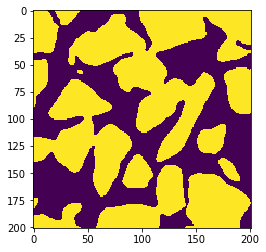

In [2]:
img=plt.imread('sand_bilevel.png')
plt.imshow(img)

## Erode

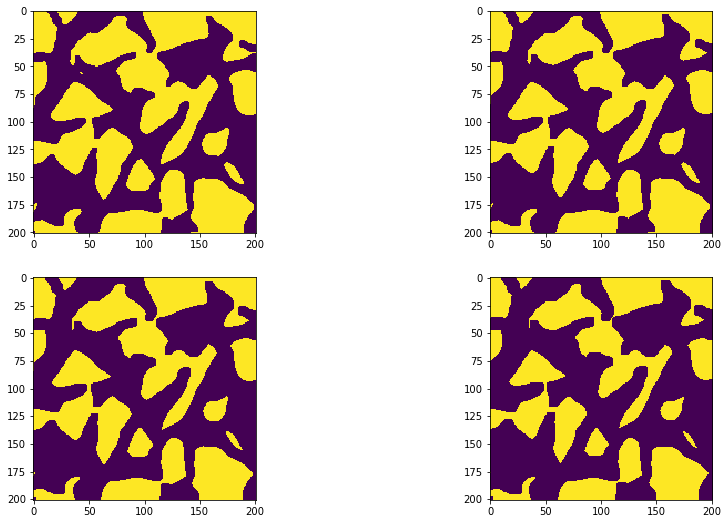

In [3]:
plt.figure(figsize=[15,9])
for i in np.arange(0,4) :
    plt.subplot(2,2,i+1)
    plt.imshow(morph.erosion(img,np.ones([3+i,3+i])))

## Dilate

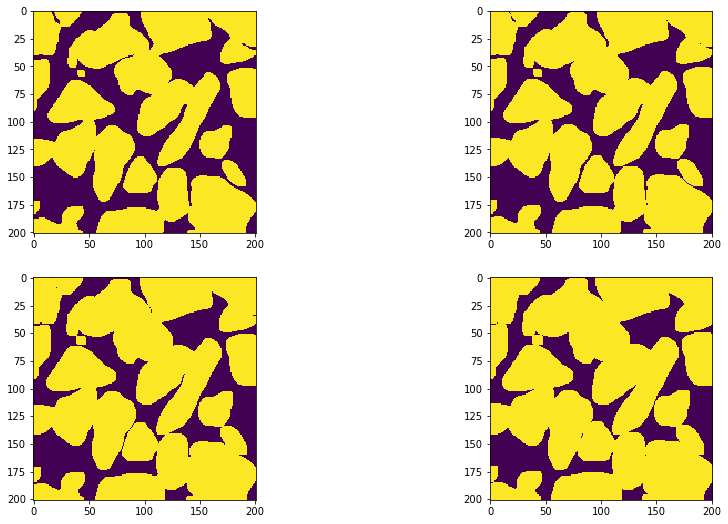

In [4]:
plt.figure(figsize=[15,9])
for i in np.arange(0,4) :
    plt.subplot(2,2,i+1)
    plt.imshow(morph.dilation(img,np.ones([3+i,3+i])))

## Open

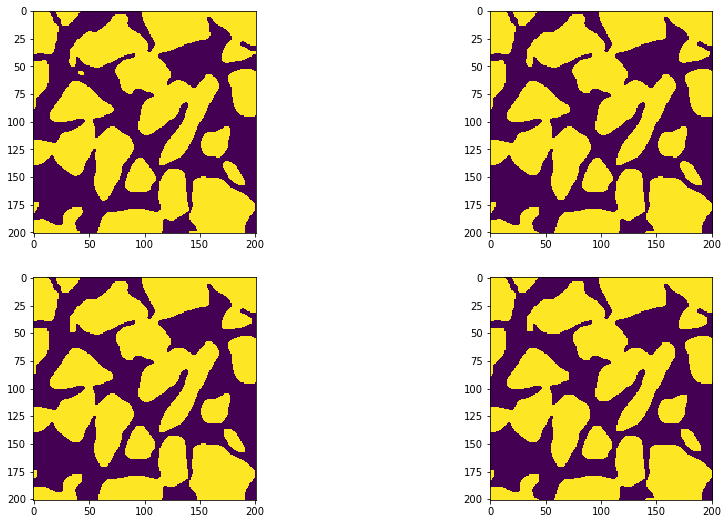

In [5]:
plt.figure(figsize=[15,9])
for i in np.arange(0,4) :
    plt.subplot(2,2,i+1)
    plt.imshow(morph.opening(img,np.ones([3+i,3+i])))

## Close

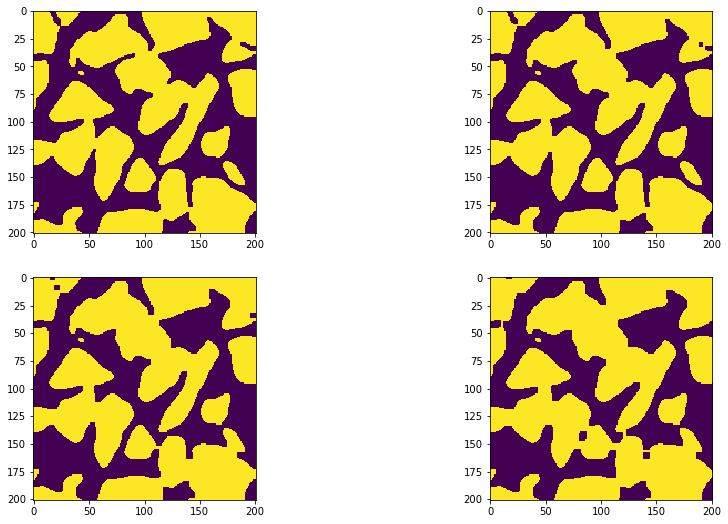

In [6]:
plt.figure(figsize=[15,9])
for i in np.arange(0,4) :
    plt.subplot(2,2,i+1)
    plt.imshow(morph.closing(img,np.ones([3+i,3+i])))

# Exercise 2 : Illumination correction
Find a structure element that corrects the inhomogeneous illumination in the image sand_grad.png using top-hats. 

Is there a difference in SE size when you use black top-hat or white top-hat, why?

In [7]:
g=plt.imread('sand_gradient.png')

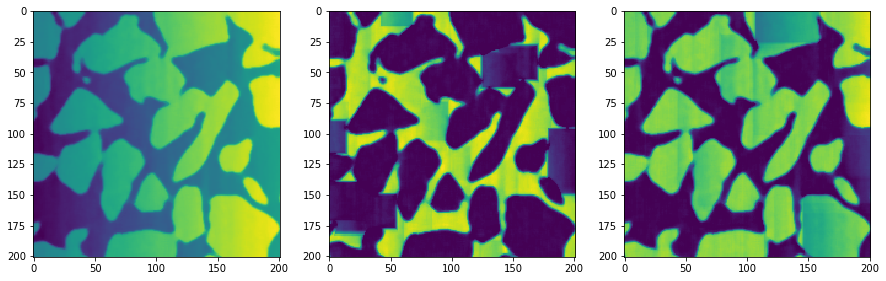

In [8]:
plt.figure(figsize=[15,7])
plt.subplot(1,3,1)
plt.imshow(g)

plt.subplot(1,3,2)
plt.imshow(morph.black_tophat(g,np.ones([25,25])))

plt.subplot(1,3,3)
plt.imshow(morph.white_tophat(g,np.ones([51,51])))

# Exercise 3 : Distance maps
Compute distance maps of the grains in the sand image using the
three metrics Euclidean, City-block, and Chessboard. Compute difference images between the first one
and the other two. What conclusion can you make regarding the
accuracy of the two connectivity based metrics compared to the
Euclidean metric.

Keep the Euclidean distance map for the next exercises.

In [15]:
eu=ndimage.distance_transform_edt(img)
cb=ndimage.distance_transform_cdt(img,metric='chessboard')
tc=ndimage.distance_transform_cdt(img,metric='taxicab')

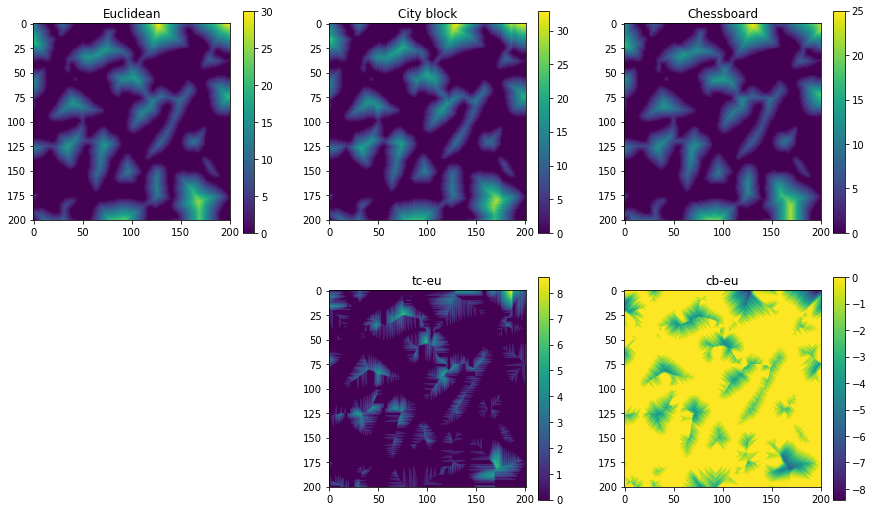

In [20]:
plt.figure(figsize=[15,9])
plt.subplot(2,3,1)
plt.imshow(eu)
plt.colorbar()
plt.title('Euclidean')

plt.subplot(2,3,2)
plt.imshow(tc)
plt.colorbar()
plt.title('City block')

plt.subplot(2,3,3)
plt.imshow(cb)
plt.colorbar()
plt.title('Chessboard')

plt.subplot(2,3,5)
plt.imshow(tc-eu)
plt.colorbar()
plt.title('tc-eu')

plt.subplot(2,3,6)
plt.imshow(cb-eu)
plt.colorbar()
plt.title('cb-eu')


<b>Conclusion</b>: City block overestiates the distance, while chessboard under estimates

# Exercise 4: Local extrema

Compute the distance maps of both grains and pore space in the
sand image and combine them into one image as
\[
g=D_{\mathcal{E}}(f^c)-D_{\mathcal{E}}(f)
\]
Test the palette of local extrema functions on $g$.

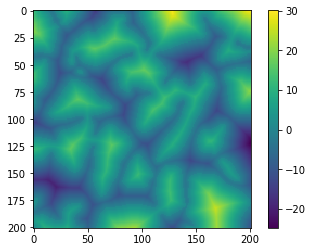

In [23]:
g=ndimage.distance_transform_edt(img)-ndimage.distance_transform_edt(1-img)
plt.imshow(g)
plt.colorbar()

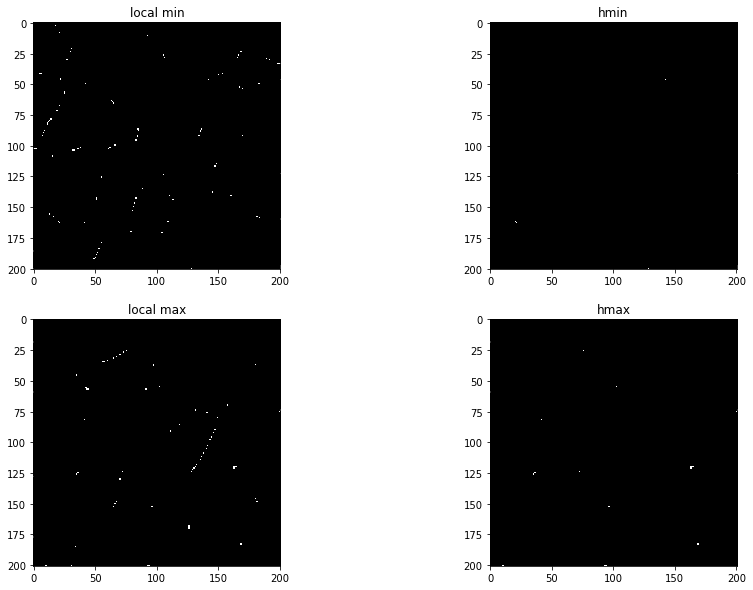

In [29]:
plt.figure(figsize=[15,10])
h=10
plt.subplot(2,2,1)
plt.imshow(morph.local_minima(g),cmap='gray')
plt.title('local min')

plt.subplot(2,2,2)
plt.imshow(morph.h_minima(g,h),cmap='gray')
plt.title('hmin')

plt.subplot(2,2,3)
plt.imshow(morph.local_maxima(g),cmap='gray')
plt.title('local max')

plt.subplot(2,2,4)
plt.imshow(morph.h_maxima(g,h),cmap='gray')
plt.title('hmax')



# Exercise 5: Watershed segmentation
Reading: http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=watershed#skimage.morphology.watershed
and 
http://www.scipy-lectures.org/packages/scikit-image/auto_examples/plot_segmentations.html

To segment a binary image with WS you have to compute it's
distance map (hopefully already done\ldots). The distance you have
does not show valleys as we want but rather mountains, hence we
have to negate the distance map.

The recommended peak_local_max does not perform that good for this data. I suggest using h_maxima instead

In [38]:
from skimage.feature import peak_local_max

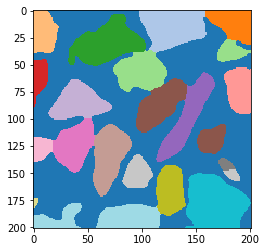

In [79]:
distance = ndimage.distance_transform_edt(img)
h=3 # what happens when h is changed?
local_maxi=morph.h_maxima(distance,h)
markers = measure.label(local_maxi)
labels_ws = morph.watershed(-distance, markers, mask=img)
plt.imshow(labels_ws, cmap=plt.get_cmap('Vega20'))